In [1]:
library(readr)
library(dplyr)
library(tidyr)
library(stringr)
library(lfe)
library(ggsci)
library(lubridate)
library(ggplot2)
library(doMC)
library(gridExtra)
library(ggpubr)
library(stargazer)
registerDoMC(4)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘lubridate’


The following objects are masked from ‘package:dplyr’:

    intersect, setdiff, union


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: foreach

Loading required package: iterators

Loading required package: parallel


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 




In [2]:
fp <- '/pool001/mfzhao/'
df <- read_rds(str_c(fp, '/PROCESSED_DATA/panel_pre_xgr.RDS'))

In [3]:
df %>%
    mutate(as_newcases  = asinh(newcases),
           as_newdeaths = asinh(newdeaths),
           as_stnewcases  = asinh(stnewcases),
           as_stnewdeaths = asinh(stnewdeaths),
           ct_unemp_rate = as.numeric(ct_unemp_rate),
           st_unemp_rate = as.numeric(st_unemp_rate)) %>%
    select(key,
           date, 
           cluster,
           n,
           log_mcbgv,
           log_pnchd,
           log_pgt1hafh, 
           log_ppthlt75,
           log_pgt2kmt,
           matches('unemp'),
           matches('^log_stalter_'), 
           matches('^[pt][rm][ca][px][01][0-9]$'),
           matches('^p[123]...$'),
           matches('stalter_p[123]...$'),
           matches('stalter[NF]'),
           matches('stalter_[pt][rm][ca][px][01][0-9]$'),
           matches('as_(st)?new')) -> df

In [4]:
df %>%
    group_by(key) %>%
    arrange(key, date) %>%
    mutate_at(vars(p1sdp, p2shp, p3rop),
              .funs = list(l01 = function(x) lag(x) - lag(x, 2),
                           l02 = function(x) lag(x, 2) - lag(x, 3),
                           l03 = function(x) lag(x, 3) - lag(x, 4),
                           l04 = function(x) lag(x, 4) - lag(x, 5),
                           l05 = function(x) lag(x, 5) - lag(x, 6),
                           l06 = function(x) lag(x, 6) - lag(x, 7),
                           l07 = function(x) lag(x, 7) - lag(x, 8),
                           l08 = function(x) lag(x, 8) - lag(x, 9),
                           l09 = function(x) lag(x, 9) - lag(x, 10),
                           l10 = function(x) lag(x, 10) - lag(x, 11),
                           l11 = function(x) lag(x, 11) - lag(x, 12),
                           l12 = function(x) lag(x, 12) - lag(x, 13),
                           l13 = function(x) lag(x, 13) - lag(x, 14),
                           l14 = function(x) lag(x, 14) - lag(x, 15),
                           l15 = function(x) lag(x, 15) - lag(x, 16),
                           l16 = function(x) lag(x, 16) - lag(x, 17),
                           l17 = function(x) lag(x, 17) - lag(x, 18),
                           l18 = function(x) lag(x, 18) - lag(x, 19),
                           l19 = function(x) lag(x, 19) - lag(x, 20),
                           l20 = function(x) lag(x, 20) - lag(x, 21),
                           l21 = function(x) lag(x, 21),
                           m01 = function(x) lead(x) - x,
                           m02 = function(x) lead(x, 2) - lead(x, 1),
                           m03 = function(x) lead(x, 3) - lead(x, 2),
                           m04 = function(x) lead(x, 4) - lead(x, 3),
                           m05 = function(x) lead(x, 5) - lead(x, 4),
                           m06 = function(x) lead(x, 6) - lead(x, 5),
                           m07 = function(x) lead(x, 7) - lead(x, 6),
                           m08 = function(x) lead(x, 8) - lead(x, 7),
                           m09 = function(x) lead(x, 9) - lead(x, 8),
                           m10 = function(x) lead(x, 10) - lead(x, 9),
                           m11 = function(x) lead(x, 11) - lead(x, 10),
                           m12 = function(x) lead(x, 12) - lead(x, 11),
                           m13 = function(x) lead(x, 13) - lead(x, 12),
                           m14 = function(x) lead(x, 14) - lead(x, 13),
                           m15 = function(x) lead(x, 15) - lead(x, 14),
                           m16 = function(x) lead(x, 16) - lead(x, 15),
                           m17 = function(x) lead(x, 17) - lead(x, 16),
                           m18 = function(x) lead(x, 18) - lead(x, 17),
                           m19 = function(x) lead(x, 19) - lead(x, 18),
                           m20 = function(x) lead(x, 20) - lead(x, 19),
                           m21 = function(x) lead(x, 21) - lead(x, 20))) %>%
    mutate_at(vars(p1sdp, p2shp, p3rop), ~(. - lag(.))) -> df
                           
df %>%
    fill(matches('p[123]...$'), .direction = 'up') %>%
    fill(matches("m[012][0-9]"), .direction = 'down') %>%
    fill(matches("l[012][0-9]"), .direction = 'up') -> df

In [5]:
cns <- colnames(df)
cns

[1] "key"                  "date"                 "cluster"             
  [4] "n"                    "log_mcbgv"            "log_pnchd"           
  [7] "log_pgt1hafh"         "log_ppthlt75"         "log_pgt2kmt"         
 [10] "ct_unemp_rate"        "st_unemp_rate"        "log_stalter_mcbgv"   
 [13] "log_stalter_pnchd"    "log_stalter_pgt1hafh" "log_stalter_ppthlt75"
 [16] "log_stalter_pgt2kmt"  "prcp01"               "prcp02"              
 [19] "prcp03"               "prcp04"               "prcp05"              
 [22] "prcp06"               "prcp07"               "prcp08"              
 [25] "prcp09"               "prcp10"               "tmax02"              
 [28] "tmax03"               "tmax04"               "tmax05"              
 [31] "tmax06"               "tmax07"               "tmax08"              
 [34] "tmax09"               "tmax10"               "p1sdp"               
 [37] "p2shp"                "p3rop"                "stalter_p1sdp"       
 [40] "stalter_p2shp"        "stalter_p3rop"        "stalterNear_p1sdp"   
 [43] "stalterNear_p2shp"    "stalterNear_p3rop"    "stalterFar_p1sdp"    
 [46] "stalterFar_p2shp"     "stalterFar_p3rop"     "stalter_prcp01"      
 [49] "stalter_prcp02"       "stalter_prcp03"       "stalter_prcp04"      
 [52] "stalter_prcp05"       "stalter_prcp06"       "stalter_prcp07"      
 [55] "stalter_prcp08"       "stalter_prcp09"       "stalter_prcp10"      
 [58] "stalter_tmax02"       "stalter_tmax03"       "stalter_tmax04"      
 [61] "stalter_tmax05"       "stalter_tmax06"       "stalter_tmax07"      
 [64] "stalter_tmax08"       "stalter_tmax09"       "stalter_tmax10"      
 [67] "as_newcases"          "as_newdeaths"         "as_stnewcases"       
 [70] "as_stnewdeaths"       "p1sdp_l01"            "p2shp_l01"           
 [73] "p3rop_l01"            "p1sdp_l02"            "p2shp_l02"           
 [76] "p3rop_l02"            "p1sdp_l03"            "p2shp_l03"           
 [79] "p3rop_l03"            "p1sdp_l04"            "p2shp_l04"           
 [82] "p3rop_l04"            "p1sdp_l05"            "p2shp_l05"           
 [85] "p3rop_l05"            "p1sdp_l06"            "p2shp_l06"           
 [88] "p3rop_l06"            "p1sdp_l07"            "p2shp_l07"           
 [91] "p3rop_l07"            "p1sdp_l08"            "p2shp_l08"           
 [94] "p3rop_l08"            "p1sdp_l09"            "p2shp_l09"           
 [97] "p3rop_l09"            "p1sdp_l10"            "p2shp_l10"           
[100] "p3rop_l10"            "p1sdp_l11"            "p2shp_l11"           
[103] "p3rop_l11"            "p1sdp_l12"            "p2shp_l12"           
[106] "p3rop_l12"            "p1sdp_l13"            "p2shp_l13"           
[109] "p3rop_l13"            "p1sdp_l14"            "p2shp_l14"           
[112] "p3rop_l14"            "p1sdp_l15"            "p2shp_l15"           
[115] "p3rop_l15"            "p1sdp_l16"            "p2shp_l16"           
[118] "p3rop_l16"            "p1sdp_l17"            "p2shp_l17"           
[121] "p3rop_l17"            "p1sdp_l18"            "p2shp_l18"           
[124] "p3rop_l18"            "p1sdp_l19"            "p2shp_l19"           
[127] "p3rop_l19"            "p1sdp_l20"            "p2shp_l20"           
[130] "p3rop_l20"            "p1sdp_l21"            "p2shp_l21"           
[133] "p3rop_l21"            "p1sdp_m01"            "p2shp_m01"           
[136] "p3rop_m01"            "p1sdp_m02"            "p2shp_m02"           
[139] "p3rop_m02"            "p1sdp_m03"            "p2shp_m03"           
[142] "p3rop_m03"            "p1sdp_m04"            "p2shp_m04"           
[145] "p3rop_m04"            "p1sdp_m05"            "p2shp_m05"           
[148] "p3rop_m05"            "p1sdp_m06"            "p2shp_m06"           
[151] "p3rop_m06"            "p1sdp_m07"            "p2shp_m07"           
[154] "p3rop_m07"            "p1sdp_m08"            "p2shp_m08"           
[157] "p3rop_m08"            "p1sdp_m09"            "p2shp_m09"           
[160] "p3rop_m09"          

In [6]:
wctrls  <- str_c(cns[str_detect(cns, '[pt][rm][ca][px]..')], collapse = ' + ')
cdctrls <- str_c(cns[str_detect(cns, '[acs][st]_')], collapse = ' + ')
ctrls   <- str_c(wctrls, ' + ', cdctrls)

In [7]:
lnl   <- str_c(cns[str_detect(cns, '^p[123]..._[ml][012][0-9]')], collapse = ' + ')
wctrls  <- str_c(cns[str_detect(cns, '[pt][rm][ca][px]..')], collapse = ' + ')
cdctrls <- str_c(cns[str_detect(cns, '[acs][st]_')], collapse = ' + ')
ctrls   <- str_c(wctrls, ' + ', cdctrls)

f1    <- str_c(' p1sdp + p2shp + p3rop + ', lnl, ' + ', ctrls)  
f2    <- str_c(' p1sdp + p2shp + p3rop + stalter_p1sdp + stalter_p2shp + stalter_p3rop + ', lnl, ' + ', ctrls)

In [8]:
f1

[1] " p1sdp + p2shp + p3rop + p1sdp_l01 + p2shp_l01 + p3rop_l01 + p1sdp_l02 + p2shp_l02 + p3rop_l02 + p1sdp_l03 + p2shp_l03 + p3rop_l03 + p1sdp_l04 + p2shp_l04 + p3rop_l04 + p1sdp_l05 + p2shp_l05 + p3rop_l05 + p1sdp_l06 + p2shp_l06 + p3rop_l06 + p1sdp_l07 + p2shp_l07 + p3rop_l07 + p1sdp_l08 + p2shp_l08 + p3rop_l08 + p1sdp_l09 + p2shp_l09 + p3rop_l09 + p1sdp_l10 + p2shp_l10 + p3rop_l10 + p1sdp_l11 + p2shp_l11 + p3rop_l11 + p1sdp_l12 + p2shp_l12 + p3rop_l12 + p1sdp_l13 + p2shp_l13 + p3rop_l13 + p1sdp_l14 + p2shp_l14 + p3rop_l14 + p1sdp_l15 + p2shp_l15 + p3rop_l15 + p1sdp_l16 + p2shp_l16 + p3rop_l16 + p1sdp_l17 + p2shp_l17 + p3rop_l17 + p1sdp_l18 + p2shp_l18 + p3rop_l18 + p1sdp_l19 + p2shp_l19 + p3rop_l19 + p1sdp_l20 + p2shp_l20 + p3rop_l20 + p1sdp_l21 + p2shp_l21 + p3rop_l21 + p1sdp_m01 + p2shp_m01 + p3rop_m01 + p1sdp_m02 + p2shp_m02 + p3rop_m02 + p1sdp_m03 + p2shp_m03 + p3rop_m03 + p1sdp_m04 + p2shp_m04 + p3rop_m04 + p1sdp_m05 + p2shp_m05 + p3rop_m05 + p1sdp_m06 + p2shp_m06 + p3rop_m06 + p1sdp_m07 + p2shp_m07 + p3rop_m07 + p1sdp_m08 + p2shp_m08 + p3rop_m08 + p1sdp_m09 + p2shp_m09 + p3rop_m09 + p1sdp_m10 + p2shp_m10 + p3rop_m10 + p1sdp_m11 + p2shp_m11 + p3rop_m11 + p1sdp_m12 + p2shp_m12 + p3rop_m12 + p1sdp_m13 + p2shp_m13 + p3rop_m13 + p1sdp_m14 + p2shp_m14 + p3rop_m14 + p1sdp_m15 + p2shp_m15 + p3rop_m15 + p1sdp_m16 + p2shp_m16 + p3rop_m16 + p1sdp_m17 + p2shp_m17 + p3rop_m17 + p1sdp_m18 + p2shp_m18 + p3rop_m18 + p1sdp_m19 + p2shp_m19 + p3rop_m19 + p1sdp_m20 + p2shp_m20 + p3rop_m20 + p1sdp_m21 + p2shp_m21 + p3rop_m21 + prcp01 + prcp02 + prcp03 + prcp04 + prcp05 + prcp06 + prcp07 + prcp08 + prcp09 + prcp10 + tmax02 + tmax03 + tmax04 + tmax05 + tmax06 + tmax07 + tmax08 + tmax09 + tmax10 + stalter_prcp01 + stalter_prcp02 + stalter_prcp03 + stalter_prcp04 + stalter_prcp05 + stalter_prcp06 + stalter_prcp07 + stalter_prcp08 + stalter_prcp09 + stalter_prcp10 + stalter_tmax02 + stalter_tmax03 + stalter_tmax04 + stalter_tmax05 + stalter_tmax06 + stalter_tmax07 + stalter_tmax08 + stalter_tmax09 + stalter_tmax10 + ct_unemp_rate + st_unemp_rate + as_newcases + as_newdeaths + as_stnewcases + as_stnewdeaths"

In [9]:
ldvs <- c('log_mcbgv', 'log_pgt2kmt', 'log_pgt1hafh', 'log_pnchd')

In [10]:
get_coefs <- function(dv, vars, ivmod = F, ...) {
    lhs <- str_c(dv, ' ~ ')
    rhs <- str_c(vars, '| key + date | ')

    if(ivmod == T) {
        alter_weather <- str_c(cns[str_detect(cns, '^stalter_[pt][rm][ca][px][01][0-9]\\.r$')], collapse = ' + ')
        iv <- ifelse(str_detect(dv, 'log'), str_replace(dv, 'log', 'log_stalter'), str_c('alter_', dv))
        ivf <- str_c('(', iv, ' ~ ', alter_weather, ') | cluster')
        rhs <- str_c(rhs, ivf)
    } else {
        rhs <- str_c(rhs, '0 | cluster')
    }
    form <- as.formula(str_c(lhs, rhs))
    model <- felm(form, df, weights = df$n, ...)
    
    as.data.frame(summary(model)$coef) %>%
        mutate(var   = rownames(.),
               dv    = dv,
               model = ifelse(vars == f1, 'base', 'ap'),
               model = ifelse(ivmod, str_c(model, ' + iv'), model)) %>%
        filter(!str_detect(var, '[pPtT][rRmM][cCaA][pPxX]')) %>%
        filter(!str_detect(var, '^[acs][st]_')) %>%
        select(7, 6, 5, 1, 2, 3, 4) -> out
    
    colnames(out) <- c('model', 'dv', 'var', 'estimate', 'se', 't', 'p-val')
    return(out)
}

In [11]:
foreach(dv = ldvs, .combine = rbind) %dopar% 
    get_coefs(dv, f2, ivmod = F) -> coefs

In [12]:
coefs %>%
    filter(str_detect(var, 'l13'))

model,dv,var,estimate,se,t,p-val
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ap,log_mcbgv,p1sdp_l13,-0.022735997,0.03422427,-0.6643237,0.50959740
ap,log_mcbgv,p2shp_l13,-0.004304961,0.01043450,-0.4125701,0.68172125
ap,log_mcbgv,p3rop_l13,0.022816668,0.01345354,1.6959600,0.09623907
ap,log_pgt2kmt,p1sdp_l13,0.017016100,0.03876267,0.4389816,0.66260459
ap,log_pgt2kmt,p2shp_l13,-0.018302666,0.01061313,-1.7245304,0.09091589
ap,log_pgt2kmt,p3rop_l13,0.037238251,0.01869030,1.9923837,0.05191539
ap,log_pgt1hafh,p1sdp_l13,0.009120731,0.03840048,0.2375161,0.81324676
ap,log_pgt1hafh,p2shp_l13,-0.004644198,0.01089468,-0.4262811,0.67176993
ap,log_pgt1hafh,p3rop_l13,0.033197634,0.01698626,1.9543817,0.05637496


Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 12 rows [1, 2, 3, 130, 131, 132, 259, 260, 261, 388, 389, 390].”


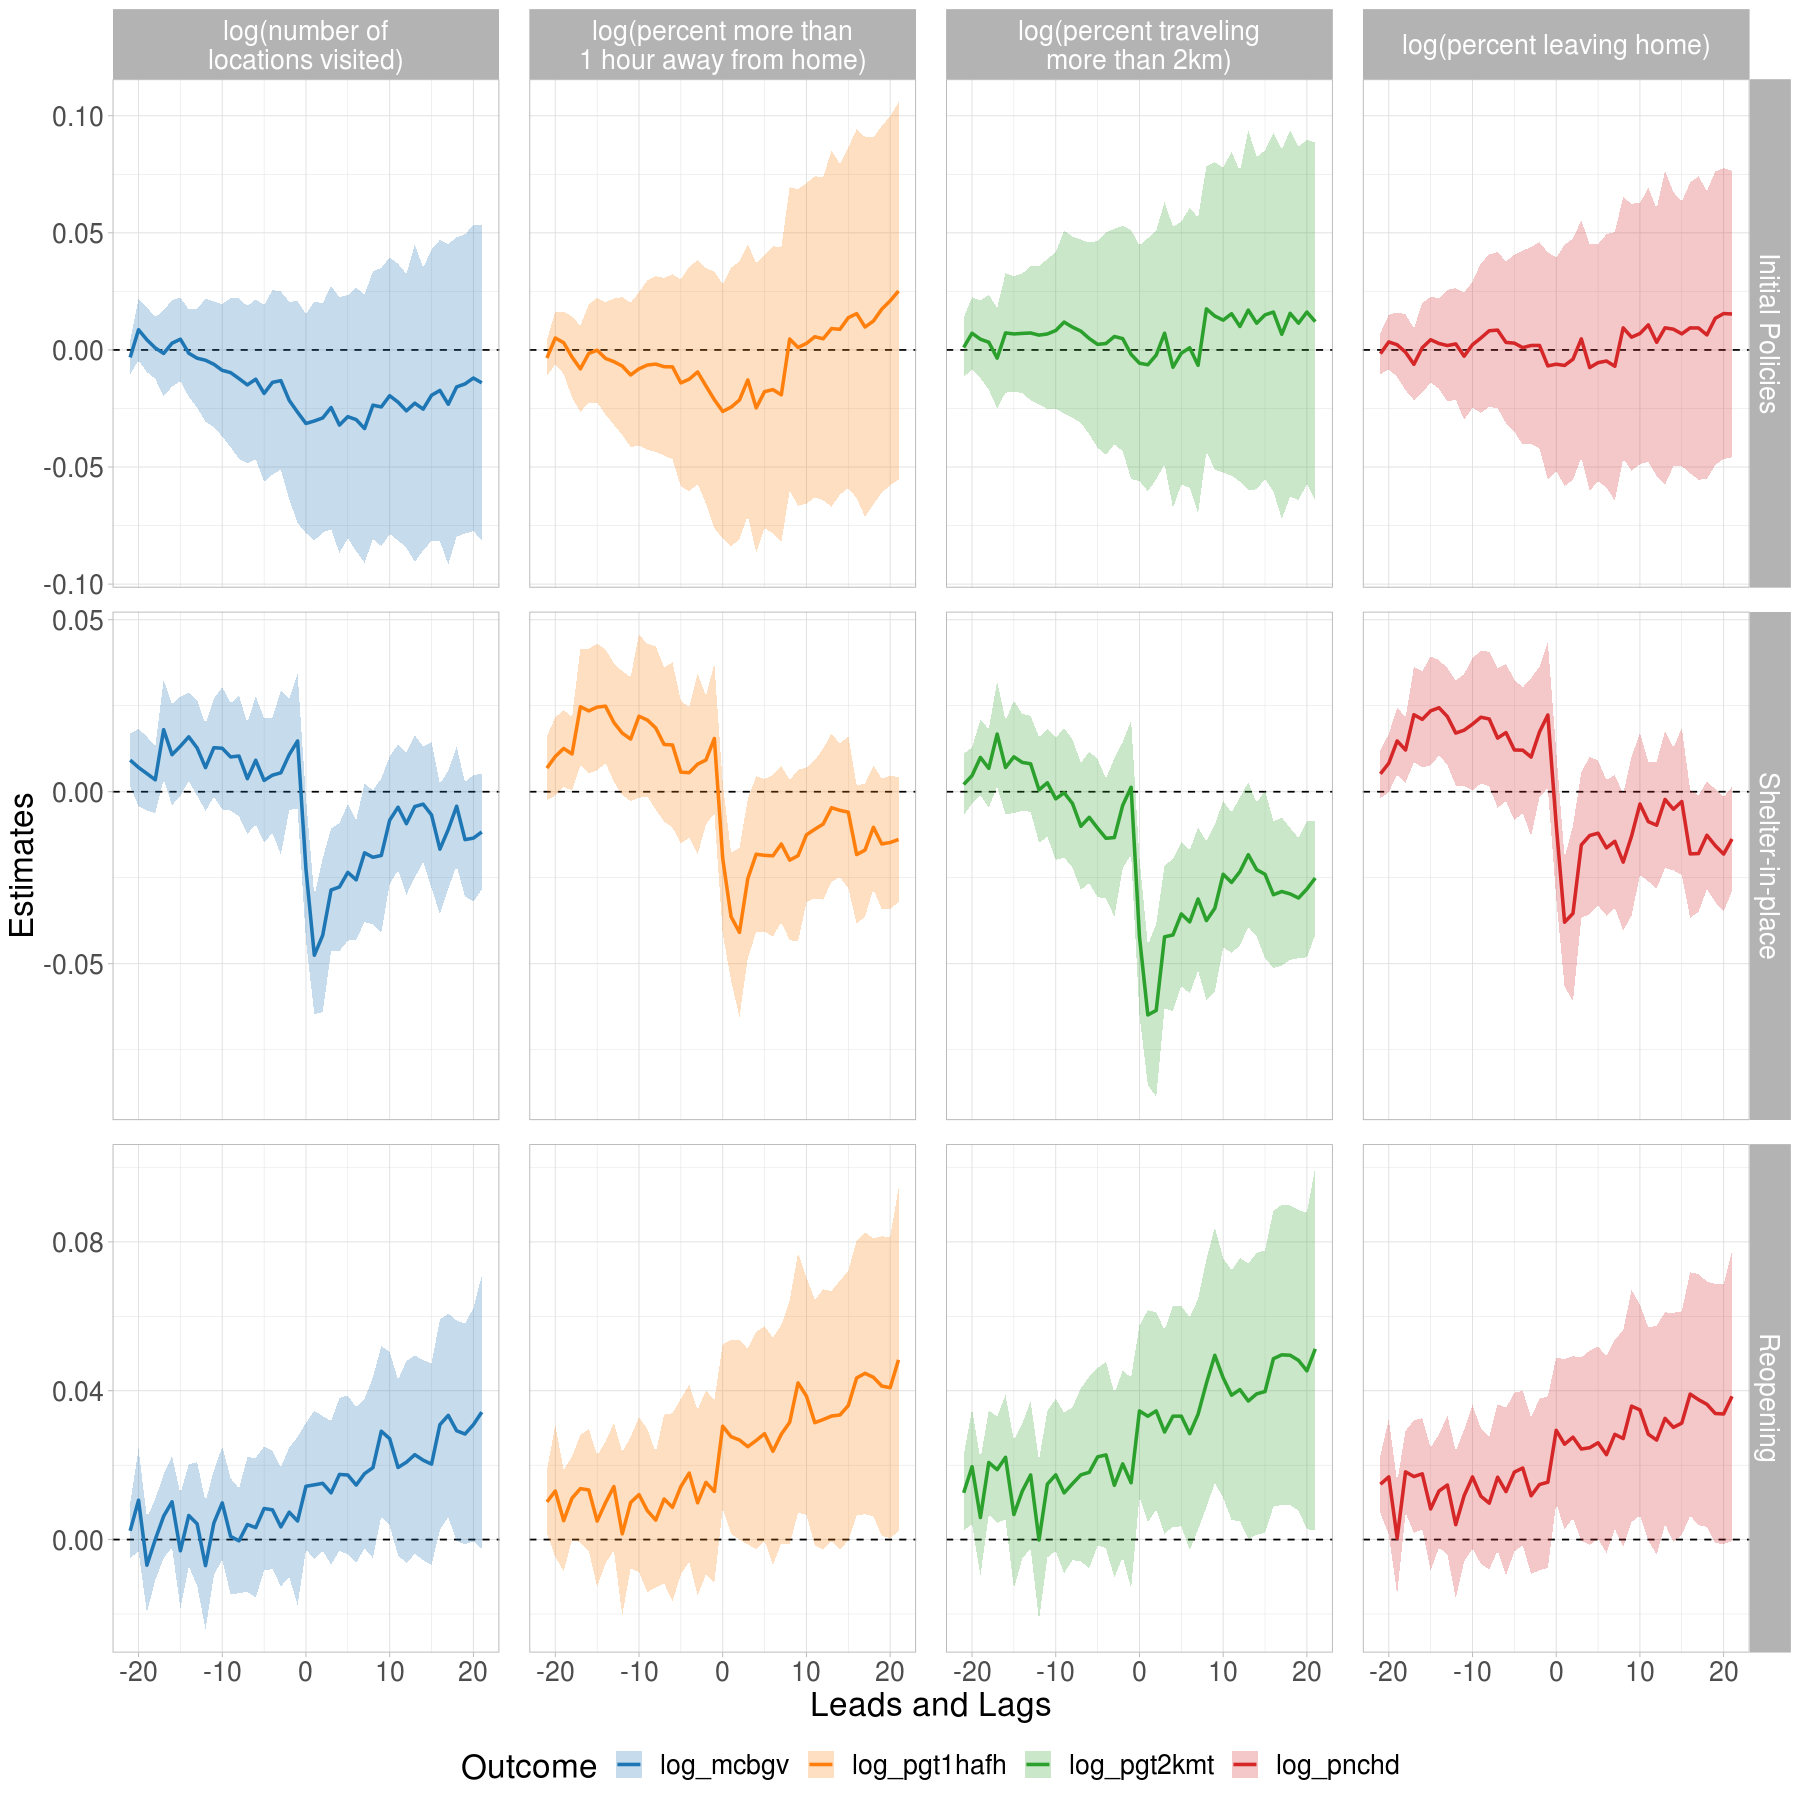

In [13]:
options(repr.plot.width=15, repr.plot.height=15)

vns <- c('p1sdp'         = "Initial Policies",
         'p2shp'         = "Shelter-in-place",
         'p3rop'         = "Reopening",
         'log_mcbgv'     = 'log(number of\nlocations visited)', 
         'log_pgt2kmt'   = 'log(percent traveling\nmore than 2km)', 
         'log_pgt1hafh'  = 'log(percent more than\n1 hour away from home)', 
         'log_pnchd'     = 'log(percent leaving home)')

coefs %>%
    filter(!str_detect(var, 'stalter')) %>%
    separate(var, into = c('var', 'll')) %>%
    mutate(ll = ifelse(is.na(ll), 0,
                      ifelse(str_detect(ll, 'l'), as.numeric(str_sub(ll, 2, 3)), -as.numeric(str_sub(ll, 2, 3))))) %>%
    ggplot(aes(x = ll, y = estimate, color = dv, fill = dv)) + 
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_line(size = 1) + 
    geom_ribbon(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), alpha = 0.25, color = NA) +
    facet_grid(var ~ dv, labeller = as_labeller(vns), scales = 'free') + 
    xlab('Leads and Lags') + 
    ylab('Estimates') +
    scale_color_d3() +
    scale_fill_d3() +
    labs(color = "Outcome", fill = 'Outcome') +
    theme_light() +
    theme(text = element_text(size=20),
          legend.position = 'bottom',
          panel.spacing.x=unit(1.25, "lines") , panel.spacing.y=unit(1,"lines"))

#ggsave('/home/mfzhao/SI_plots/rc2a_ll_main.pdf', p, device = 'pdf', width = 6.5, height = 6.5, scale = 2)

In [ ]:
vns <- c('p1sdp'         = "Ego\nInitial Policies",
         'p2shp'         = "Ego\nShelter-in-place",
         'p3rop'         = "Ego\nReopening",
         'stalter_p1sdp' = 'Alter\nInitial Policies',
         'stalter_p2shp' = 'Alter\nShelter-in-place',
         'stalter_p3rop' = 'Alter\nReopening',
         'log_mcbgv'     = 'log(number of\nlocations visited)', 
         'log_pgt2kmt'   = 'log(percent traveling\nmore than 2km)', 
         'log_pgt1hafh'  = 'log(percent more than\n1 hour away from home)', 
         'log_pnchd'     = 'log(percent leaving home)')

options(repr.plot.width=15, repr.plot.height=15)

coefs %>%
    mutate(dv  = str_replace(dv, '\\.r', ''),
           var = str_replace(var, '\\.r', ''),
           ll  = ifelse(str_detect(var, '_l[01][0-9]'), as.numeric(str_sub(var, -2, -1)), 
                        ifelse(str_detect(var, '_m[01][0-9]'), -1 * as.numeric(str_sub(var, -2, -1)), 0)),
           var = str_replace(var, '_[lm][01][0-9]', ''),
           dv_clean = vns[dv]) %>%
    filter(model == 'ap') %>%
    ggplot(aes(x = ll, y = estimate, color = dv_clean)) +
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(width = .5), size = 2) + 
    geom_linerange(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), 
                   position = position_dodge(width = .5), size = .5) +
    facet_grid(var~dv, scales = 'free_y', labeller = as_labeller(vns)) +
    xlab('') + 
    ylab('') +
    scale_color_d3() +
    labs(color = "Outcome") +
    theme_light() +
    theme(text = element_text(size=20),
          legend.position = 'bottom',
          panel.spacing.x=unit(1.25, "lines") , panel.spacing.y=unit(1,"lines")) -> p 

p

#ggsave('/home/dholtz/SI_plots/rc2a_ll_main.pdf', p, device = 'pdf', width = 6.5, height = 6.5, scale = 2)

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
pn <- c('p1sdp' = "Initial Policies",
        'p2shp' = "Shelter-in-place",
        'p3rop' = "Reopening",
        'a'     = 'ego state policy',
        'b'     = 'alter state policy')

coefs %>%
    mutate(dv  = str_replace(dv, '\\.r', ''),
           var = str_replace(var, '\\.r', ''),
           var = ifelse(str_detect(var, 'fit'), 'Peer Effect', var)) %>%
    filter(var != 'Peer Effect') %>%
    filter(model != 'base + iv') %>%
    mutate(vtype = ifelse(str_detect(var, 'stalter'), 'b', 'a'),
           var   = str_replace(var, 'stalter_', ''),
           model = factor(model, levels = c('base', 'base + iv', 'ap', 'ap + iv')),
           dv = factor(dv, levels = c('log_mcbgv', 'log_pgt2kmt', 'log_pgt1hafh', 'log_pnchd'))) %>%
    ggplot(aes(x = model, y = estimate, color = dv)) +
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(width = .5), size = 2) + 
    geom_linerange(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), 
                   position = position_dodge(width = .5), size = .5) +
    facet_grid(vtype~var, scales = 'free_y', labeller = as_labeller(pn)) +
    xlab('') + 
    ylab('') +
    ggtitle('A') + 
    scale_color_d3() +
    labs(color = "Outcome") +
    theme_light() +
    theme(text = element_text(size=20),
          legend.position = 'None',
          plot.margin = margin(0, 10, 0, 20)) -> p2a

p2a

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
apiv %>%
    filter(var == 'Peer Effect') %>%
    select(dv, pfxCoef = estimate, pfxSe = se) %>%
    left_join(apiv %>%
              filter(!str_detect(var, 'stalter'),
                     var != 'Peer Effect')) %>%
    mutate(estimate = estimate * pfxCoef,
           se       = estimate * pfxSe,
           var      = str_c('pfx_', var)) %>%
    select(model, dv, var, estimate, se, t, `p-val`) %>%
    bind_rows(apiv %>%
              filter(var != 'Peer Effect',
                     !str_detect(var, 'stalter'))) %>%
    mutate(policy = str_sub(var, -5, -1),
           type   = ifelse(str_detect(var, 'pfx'), 'Peer Effect',
                           ifelse(str_detect(var, 'stalter'), 'Alter Policy', 'Ego Policy')),
           dv = factor(dv, levels = c('log_mcbgv', 'log_pgt2kmt', 'log_pgt1hafh', 'log_pnchd'))) %>%
    ggplot(aes(x = type, y = estimate, color = dv)) + 
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(width = .5), size = 2) + 
    geom_linerange(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), 
                   position = position_dodge(width = .5), size = .5) +
    facet_grid(policy~., scales = 'free_y', labeller = as_labeller(pn)) +
    xlab('') + 
    ylab('') +
    ggtitle('B') +
    scale_color_d3() +
    labs(color = "Outcome") +
    theme_light() +
    theme(text = element_text(size=20),
          legend.position = 'None', 
          plot.margin = margin(0, 10, 0, 20)) -> p2b

p2b
#ggsave('/home/mfzhao/p2b.svg', p2b, device = 'svg', width = 2, height = 5, scale = 2)

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
pn <- c('p1sdp' = "Initial Policies",
        'p2shp' = "Shelter-in-place",
        'p3rop' = "Reopening",
        'a'     = 'ego state policy',
        'b'     = 'alter state policy')

coefs %>%
    mutate(dv  = str_replace(dv, '\\.r', ''),
           var = str_replace(var, '\\.r', ''),
           var = ifelse(str_detect(var, 'fit'), 'Peer Effect', var)) %>%
    filter(var != 'Peer Effect') %>%
    filter(model != 'base + iv') %>%
    mutate(vtype = ifelse(str_detect(var, 'stalter'), 'b', 'a'),
           var   = str_replace(var, 'stalter_', ''),
           model = factor(model, levels = c('base', 'base + iv', 'ap', 'ap + iv')),
           dv = factor(dv, levels = c('log_mcbgv', 'log_pgt2kmt', 'log_pgt1hafh', 'log_pnchd'))) %>%
    ggplot(aes(x = model, y = estimate, color = dv)) +
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(width = .5), size = 2) + 
    geom_linerange(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), 
                   position = position_dodge(width = .5), size = .5) +
    facet_grid(vtype~var, scales = 'free_y', labeller = as_labeller(pn)) +
    xlab('') + 
    ylab('') +
    scale_color_d3() +
    labs(color = "Outcome") +
    theme_light() +
    theme(text = element_text(size=20),
          legend.position = 'bottom') -> leg


get_legend(leg) %>%
    as_ggplot() -> leg

In [ ]:
p2a + theme(plot.title = element_text(hjust = -0.05, vjust = -1)) -> p2a
p2b + theme(plot.title = element_text(hjust = -0.05, vjust = -1)) -> p2b

In [ ]:
p2a + theme(plot.title = element_text(size = 30, hjust = -0.075, vjust = -1.5)) -> p2a
p2b + theme(plot.title = element_text(size = 30, hjust = -0.25, vjust = -1.5)) -> p2b
lay <- rbind(c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             c(rep(1,16), rep(2,8)),
             rep(3, 24))
grid.arrange(grobs = list(p2a, p2b, leg), layout_matrix = lay) -> p2

ggsave('/home/mfzhao/p2.pdf', p2, device = 'pdf', width = 6.5, height = 5, scale = 2)

In [ ]:
ggsave('/home/mfzhao/p2.pdf', p2, device = 'pdf', width = 6.5, height = 5, scale = 2)

In [ ]:
ggsave('/home/mfzhao/p2leg.svg', leg, device = 'svg', width = 6.5, height = 5, scale = 2)